In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In this notebook we will look at linear regression using gradient descent. We will generate synthetic data and try our algorithm on it. First we will generate a perfect line and then add some gaussian noise on it.

In [2]:
np.random.seed(0)
a0 = 0.6 
a1 = 0.3

x = np.arange(0,20,0.1)
y = a1 * x + a0 # our perfect line

# we are adding random gaussian noise to our data  
y = y + np.random.normal(0,0.5,y.shape[0])


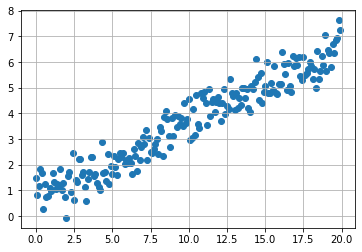

In [3]:
plt.scatter(x,y)
plt.grid()
plt.show()

Since we have a single feature we will have two coefficients. Our predictions will be in the form of y = wx +b.
We use mean squared error to calculate our error. In gradient descent algorithm we calculate our error, calculate the gradient and then go in the direction along the gradient since we want to minimize our error. To be able to do this we need to calculate the gradient by hand. Our error is (y_pred - y_real)^2 also we can write it as (wx+b - y_real)^2. If you take the derivate for w you will find that the derivate is (y_pred - y_real) * x * 2. For b the derivative is (y_pred - y) * 2. We initialize our coefficients randomly and iteratively update using the gradient which will get us to the solution. Note that the best approach is to plot the loss and cut the training on a low loss value before it starts overfitting. However we skip this step since we just want to see our implementation working.

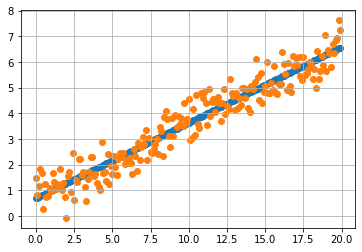

Coefficients w:[0.29491485] , b: [0.68714639]


In [4]:
np.random.seed(0)
w = np.random.rand(1)
b = np.random.rand(1)

lr = 10**-5 # we set the learning rate 
epoch = 1200 # we set how many times we will go over the data

for _ in range(epoch):
    for i,j in zip(x,y):
        pred = w * i + b
        w-= lr * (pred - j) * i * 2
        b-= lr * (pred - j) * 2

plt.scatter(x,w*x+b) # predictions
plt.scatter(x,y) # real data
plt.grid()
plt.show()       
print("Coefficients w:{} , b: {}".format(w,b))

We will also try sci-kit learns linear regression implementation and compare the results.

In [5]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x.reshape(-1,1),y)
y_sklearn = lr.predict(x.reshape(-1,1))

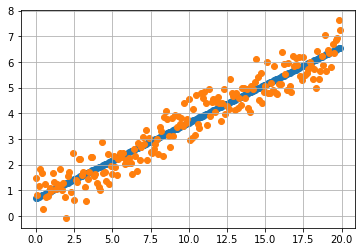

Coefficients w:[0.29530664] , b: 0.6821541524654005


In [6]:
plt.scatter(x,y_sklearn)
plt.scatter(x,y)
plt.grid()
plt.show()
print("Coefficients w:{} , b: {}".format(lr.coef_,lr.intercept_))

As you can see we get similar results with the sci-kit's implementation. Our coefficients are really close to what sci-kit's linear regressor found. You can see this better in the plot below. Lines predicted by both implementations are so close they one of them block the other on the plot.

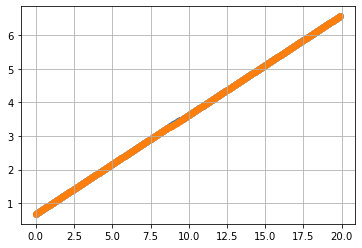

In [7]:
plt.scatter(x,w*x+b) # scratch model predics similar to sklearn
plt.scatter(x,y_sklearn)
plt.grid()
plt.show()

Lastly we will implement the closed form solution. In gradient descent we calculate gradients at each step using our error and slowly move in the direction of the gradient with the goal of making the error zero. However we can actually do this in a single step. We can do this by calculating the gradient, setting to zero and solving the equation. Note that now the input x will not be a single sample but the whole dataset. The equation will now be in the form of Y = X * B. Here B is our coefficients or in other terms (w,b). X is the whole dataset and because we are using matrix multiplications X will have a second column of ones. So X will be in the form of ((x1,1),(x2,1),.....(xn,1)). Lets check the multiplication just for the first row. (x1,1) * (w,b) = x1 * w + 1 * b = wx+b. So we add the ones column just to use matrix operations. If you do the calculations you will find that the value of B matrix which gives us the lowest loss is equal to (X.T * X)-1 * X.T * y . Here T denotes transpose of the matrix, -1 is the inverse of the matrix and * is the dot product. If we compute this it will should give us the same regression coefficients as before.

In [8]:
X = np.stack((x,np.ones(x.shape[0])),axis=1) # add column of ones

# we break the operations into a couple of steps to make it more clear
c0 = np.dot(X.T,X)
c1 = np.linalg.inv(c0)
c2 = np.dot(c1,X.T)
c3 = np.dot(c2,y)

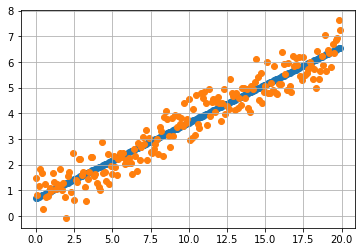

Coefficients w:0.29530664262363604 , b: 0.6821541524654031


In [9]:
y_closed = np.dot(X,c3)

plt.scatter(x,y_closed)
plt.scatter(x,y)
plt.grid()
plt.show()   
print("Coefficients w:{} , b: {}".format(c3[0],c3[1]))

Now lets compare the cofficients we have found using each method.

In [10]:
print("Coefficients of gradient descent w:{:.4f} , b: {:.4f}".format(w[0],b[0]))
print("Coefficients of scikit w:{:.4f} , b: {:.4f}".format(lr.coef_[0],lr.intercept_))
print("Coefficients closed form solution w:{:.4f} , b: {:.4f}".format(c3[0],c3[1]))

Coefficients of gradient descent w:0.2949 , b: 0.6871
Coefficients of scikit w:0.2953 , b: 0.6822
Coefficients closed form solution w:0.2953 , b: 0.6822


You can see that more or less we find the same results in each solution. After seeing the closed form solution you may think why we bother with the gradient descent anyway, the problem is as your data gets bigger you matrix size X and Y gets bigger. This results in more matrix operations and don't forget that you have to compute mutliple matrix operations such as getting the transpose, taking the inverse and dot product. So which way to go depends on the efficieny for a particular situation.